In [1]:
import os
import geopandas as gpd
import rasterio
import numpy as np
import matplotlib.pyplot as plt
from dem_utils_import import load_json, plot_rast, load_rast
import crop_raster
import classify_rasters
import points_into_polygons

C:\Users\montse\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\geopandas\_compat.py:112: UserWarning: The Shapely GEOS version (3.10.2-CAPI-1.16.0) is incompatible with the GEOS version PyGEOS was compiled with (3.10.3-CAPI-1.16.1). Conversions between both will be slow.
  warnings.warn(


## Test crop_raster module:
  - Flatten Raster to 2-DIM
  - Mask by shape

In [3]:
trails_path = 'C:/Users/montse/Desktop/ARI-Git/jupyterlab-data-science/src/data/geo_data_saetde/trails_4326.geojson'
output_geojson_path = '../outputs/geojson/trails_2d.geojson'
output_shp_path = '../outputs/geojson/trails_2d.shp'
trails = crop_raster.flatten_raster_two_dim(output_geojson_path, output_shp_path, trails_geojson_path=trails_path)

In [4]:
x = load_json.load_json_file(trails_path)
x

{'type': 'FeatureCollection',
 'name': 'trails_4326',
 'crs': {'type': 'name',
  'properties': {'name': 'urn:ogc:def:crs:OGC:1.3:CRS84'}},
 'features': [{'type': 'Feature',
   'properties': {'production': 1,
    'trail_name': 'Deveses',
    'customer': 'saetde',
    'ski_resort': 'grandvalira',
    'sector': 'cubil',
    'section': 1,
    'trail_code': 'deveses',
    'section_na': '1',
    'area_local': 8516,
    'difficulty': 'easy',
    'type': 'trail'},
   'geometry': {'type': 'MultiPolygon',
    'coordinates': [[[[1.660701149422738, 42.5449348667138, 2455.22],
       [1.660682638380506, 42.54491116725579, 0.0],
       [1.660426231243396, 42.54494992026595, 0.0],
       [1.660252426301265, 42.544910461755165, 0.0],
       [1.660162277738925, 42.54486581219417, 0.0],
       [1.660048622706262, 42.544814340366955, 2450.35],
       [1.660033788615, 42.54482388030284, 2450.06],
       [1.660008186519906, 42.544827594466526, 2449.61],
       [1.659929086538025, 42.544804251892515, 2448.9

In [6]:
dem_path = '../inputs/dem_saetde.tif'
out_path  = '../outputs/rasters/cropped_dem.tif'
crop_raster.mask_by_shape(dem_path, output_shp_path, out_path)

In [7]:
file = rasterio.open(out_path).read()
file_nodata = np.where(file > 3.3999e38, np.nan, file)
#file_nodata

## Test classify_rasters module:
  - gdal processing
  - Classify rasters

Test gdal_processing

In [9]:
input_path = '../outputs/rasters/cropped_dem.tif'
imageio_input_path = '../outputs/rasters/cropped_dem_imageio.tif'
output_slope_path = '../outputs/rasters/dem_slope.tif'
output_aspect_path = '../outputs/rasters/dem_aspect.tif'

classify_rasters.gdal_processing(input_path, imageio_input_path, output_slope_path, output_aspect_path)

Test classify_raster

In [10]:
#We define a list with the cond
  #input_cond = [min_height, max_height, min_slope, max_slope, min_aspect, max_aspect, 0]
    # if input_cond[6] == 1, aspect == NORTH!

list_conditions = [2000, 2200, 10, 30, 45, 200, 0]
out_classif_path = '../outputs/rasters/classified_raster_2.tif'

classify_rasters.classify_raster(out_path, output_slope_path, output_aspect_path, list_conditions, out_classif_path)

## Test points_into_polygons module:
  - Polygonize raster
  - Points into polygons
  - Pretty gdf

In [15]:
polygonized_rast = points_into_polygons.polygonize_raster(out_classif_path)

sd_210322_path = '../inputs/snow_depth_data/grau_roig/sd_210322.geojson'
classified_points = points_into_polygons.points_into_polys(polygonized_rast, sd_210322_path)

In [16]:
class_points = points_into_polygons.pretty_gdf(classified_points)
#print(class_points.to_string())

## Map Checking

In [18]:
trails = gpd.read_file('../outputs/geojson/trails_2d.shp')

<AxesSubplot:>

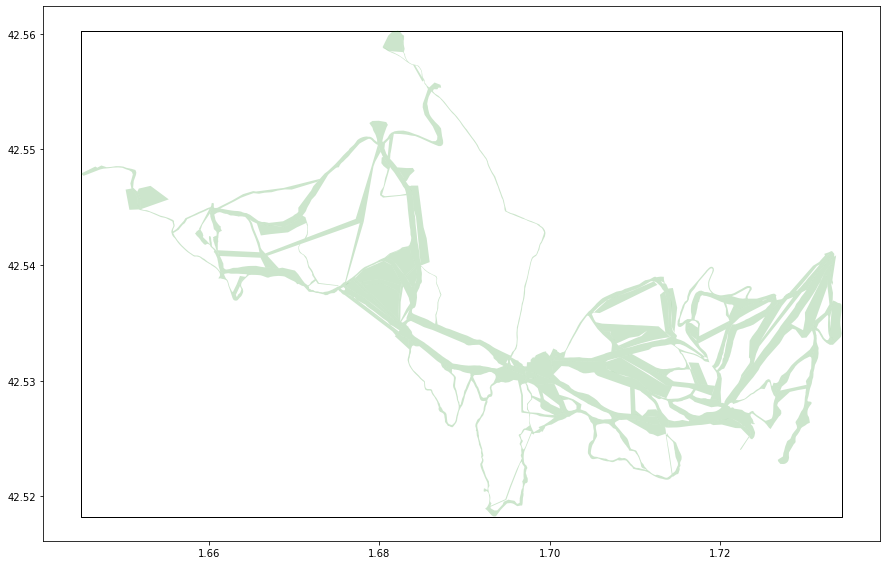

In [19]:
ax = polygonized_rast.plot(color='white', edgecolor='black', alpha=1., figsize=(15,15))
#snow_file_gdf.plot(ax = base, marker='.', color='red', markersize=0.2)
trails.plot(ax=ax, marker='.', color='green', alpha=0.2)

## Refactoring code

- Automatize all the process (from the input cropped raster)
- Make statistical analysis but for simmilar slopes (filter points in all a slope and study which is the predominant)
- Make a readme explaining the procedure
- Compare the analysis of the SRU_saetde (nil file, slack)